In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statistics

In [2]:
rename_dict = {'R&D Spend':'rd_spend',
               'Administration':'administration',
               'Marketing Spend':'marketing_spend',
               'State':'state',
               'Profit':'profit'
              }

In [3]:
df = pd.read_csv('50_Startups.csv')
df = df.rename(rename_dict,axis=1)
df.head()

,rd_spend,administration,marketing_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Linear regression assumptions

## Assumption 1: All predictor variables must have linear relationship with the target variable

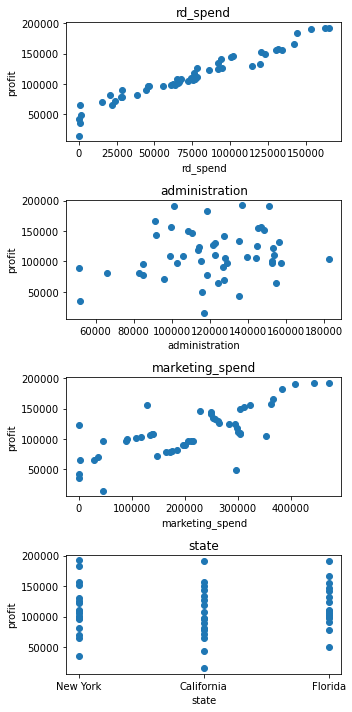

In [4]:
predictor_df = df.drop(columns=['profit'])
fig, ax = plt.subplots(nrows=len(df.drop(columns=['profit']).columns), figsize=(5,10), tight_layout=True)
for i,cols in enumerate(df.drop(columns=['profit']).columns):
    title = cols
    ax[i].scatter(df[cols],df['profit'])
    ax[i].set_title(title)
    ax[i].set_xlabel(cols)
    ax[i].set_ylabel('profit')

# Assumption 2: No multicollinearity between predictor variables

In [5]:
predictor_df.corr()

,rd_spend,administration,marketing_spend
rd_spend,1.000000,0.241955,0.724248
administration,0.241955,1.000000,-0.032154
marketing_spend,0.724248,-0.032154,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matpl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C63F4F6CC8>,
      dtype=object)

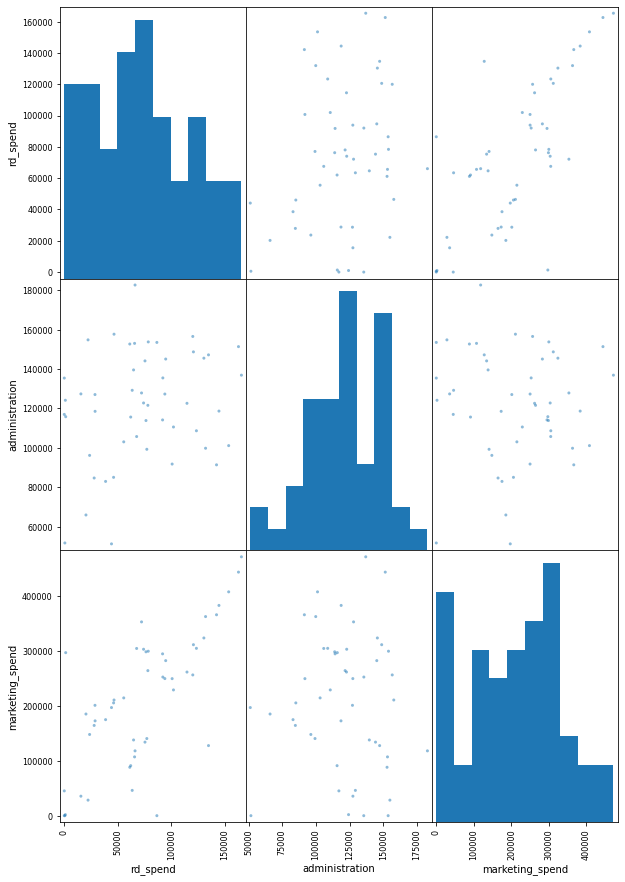

In [6]:
pd.plotting.scatter_matrix(predictor_df, figsize=(10,15))

<b>Inference:</b> Between Marketing Spend and R&D spend we have high positive correlation

# Remove NaN

In [7]:
df = df.dropna()
df.dtypes

rd_spend           float64
administration     float64
marketing_spend    float64
state               object
profit             float64
dtype: object

# The fit all model

In [8]:
res = smf.ols(formula='profit ~ rd_spend + administration + marketing_spend + C(state)', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           1.34e-27
Time:                        11:10:02   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
C(state)[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
C(state)[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
rd_spend                 0.8060      0.046     17.369      0.000       0.712       0.900
administration          -0.0270      0.052     -0.517      0.608      -0.132       0.078
marketing_spend          0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Start doing backward ellimination
Since state has a P value maximum and > significance level 0.05 we elliminate state from the model

## Remove state

In [9]:
res = smf.ols(formula='profit ~ rd_spend + administration + marketing_spend', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           4.53e-30
Time:                        11:10:03   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rd_spend            0.8057      0.045     17.846      0.000       0.715       0.897
administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>Inference:</b> We can see that Adj. R-squared increase from 0.945. Thus lack of State as predictor variable is helping the model to fit better.

## Remove administration
Since administration has highest P value > significance level 0.5 let's remove that variable

In [10]:
res = smf.ols(formula='profit ~ rd_spend + marketing_spend', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           2.16e-31
Time:                        11:10:03   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
rd_spend            0.7966      0.041     19.266      0.000       0.713       0.880
marketing_spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Remove marketing_spend
Since marketing_spend has highest P value > significance level 0.5 let's remove that variable

In [11]:
res = smf.ols(formula='profit ~ rd_spend', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           3.50e-32
Time:                        11:10:03   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
rd_spend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>Inference:</b> marketing_spend removal is making the model fit worse than keeping it. So keeping marketing spend is better fitting the model.

# Fit sklearn linear regressor

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
X = df[['rd_spend','marketing_spend']]
y = df[['profit']]

In [14]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred = lr.predict(X)

Text(0.5, 1.0, 'Fit with rd_spend')

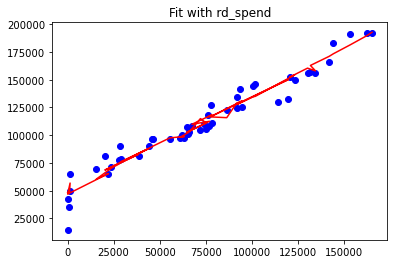

In [16]:
plt.scatter(X.rd_spend,y, color='blue')
plt.plot(X.rd_spend,y_pred, color='red')
plt.title('Fit with rd_spend')

0.02990787520578523

Text(0.5, 1.0, 'Fit with marketing_spend')

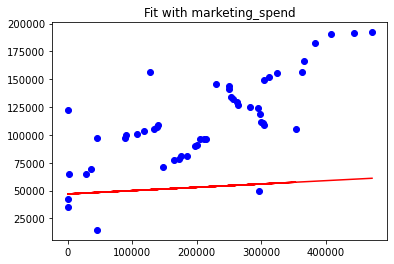

In [23]:
plt.scatter(X.marketing_spend,y, color='blue')
plt.plot(X.marketing_spend,lr.intercept_+X.marketing_spend*lr.coef_[0,1], color='red')
plt.title('Fit with marketing_spend')

# Assumption 3: Homoscedacity

Text(0.5, 1.0, 'Variation of errors w.r.t y_pred')

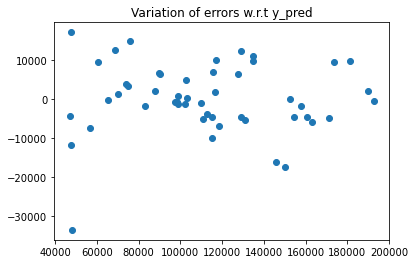

In [24]:
errors = y - y_pred
plt.scatter(y_pred,errors )
plt.title('Variation of errors w.r.t y_pred')

# Assumption 4: Error terms should be normally distributed

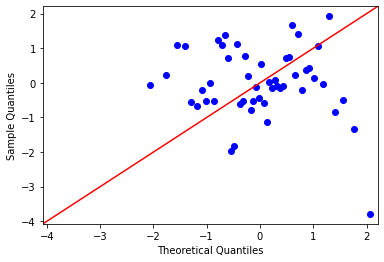

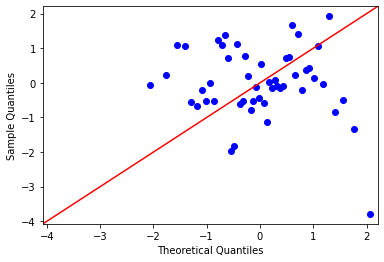

In [25]:
from statsmodels.graphics.gofplots import qqplot
qqplot(data=errors,line='45',fit=True)

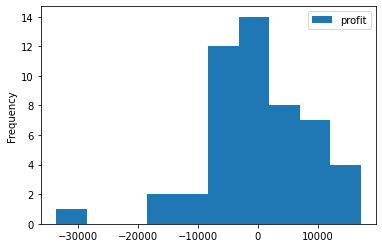

In [29]:
errors.plot.hist()